In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [2]:
df_train = pd.read_csv('./train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test = pd.read_csv('./test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent_1 = df_train.isnull().sum()/df_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

survived = 'Survived'
not_survived = 'Not Survived'

fig = make_subplots(rows=1, cols=2, vertical_spacing=0.02,
                    specs=[[{"type": "histogram"}]*2],
                    subplot_titles=("Female", "Male"))

women = df_train[df_train['Sex']=='female']
men = df_train[df_train['Sex']=='male']

fig.add_trace(go.Histogram(x=women[women['Survived']==1].Age.dropna(), name=survived, nbinsx=18, showlegend=True, marker_color='blue'), row=1, col=1)
fig.add_trace(go.Histogram(x=women[women['Survived']==0].Age.dropna(), name=not_survived, nbinsx=40, showlegend=True, marker_color='red'), row=1, col=1)
fig.update_xaxes(title_text="Age", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)

fig.add_trace(go.Histogram(x=men[men['Survived']==1].Age.dropna(), name=survived, nbinsx=18, showlegend=False, marker_color='blue'), row=1, col=2)
fig.add_trace(go.Histogram(x=men[men['Survived']==0].Age.dropna(), name=not_survived, nbinsx=40, showlegend=False, marker_color='red'), row=1, col=2)
fig.update_xaxes(title_text="Age", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=2)

fig.update_layout(title='Histograms of Age by Survival and Sex',
                  barmode = 'overlay')
fig.update_traces(opacity=0.5)

fig.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.




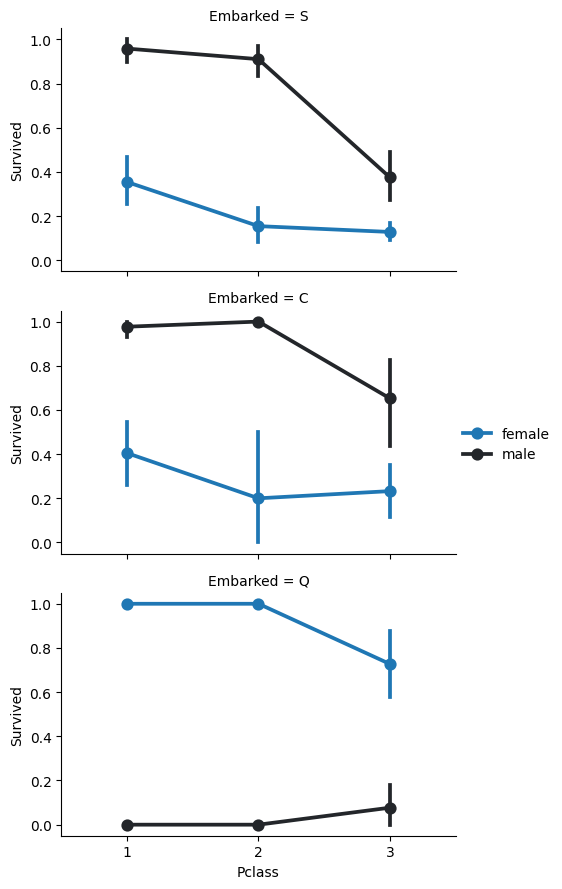

In [9]:
FacetGrid = sns.FacetGrid(df_train, row='Embarked', aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [10]:
fig = go.Figure(data=[

    go.Bar(x=df_train['Pclass'], y=df_train['Survived'], marker=dict(color='blue'))

])


fig.update_layout(title='Barplot of Survived by Pclass',

                  xaxis_title='Pclass',

                  yaxis_title='Survived')


fig.show()

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=2, vertical_spacing=0.02,
                    specs=[[{"type": "histogram2dcontour"}]*2]*3
                    )

for i, pclass in enumerate(df_train['Pclass'].unique()):
    for j, survived in enumerate(df_train['Survived'].unique()):
        df_subset = df_train[(df_train['Pclass'] == pclass) & (df_train['Survived'] == survived)]
        fig.add_trace(go.Histogram(x=df_subset['Age'], name=f'Pclass={pclass}, Survived={survived}', opacity=0.5, nbinsx=20, ), row=i+1, col=j+1)

fig.update_layout(title='Histograms of Age by Pclass and Survived',
                  xaxis_title='Age',
                  yaxis_title='Count')

fig.show()

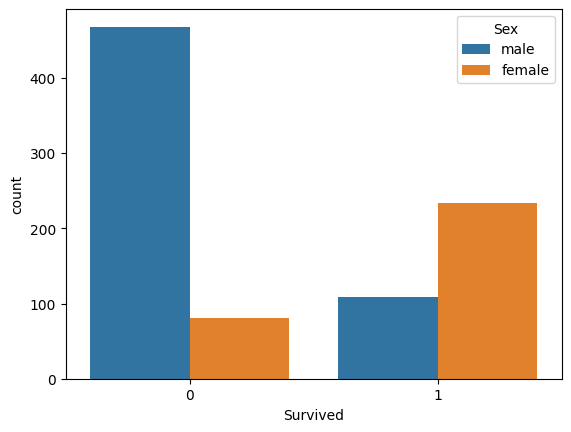

In [12]:
sns.countplot(x='Survived', hue='Sex', data=df_train)
plt.show()

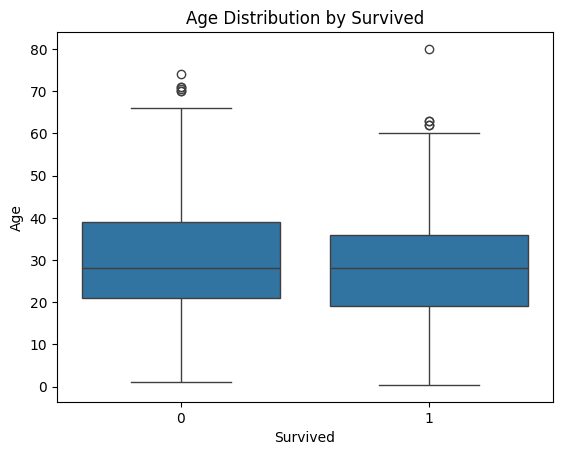

In [13]:
sns.boxplot(x='Survived', y='Age', data=df_train)
plt.title('Age Distribution by Survived')
plt.show()

In [14]:
print(df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


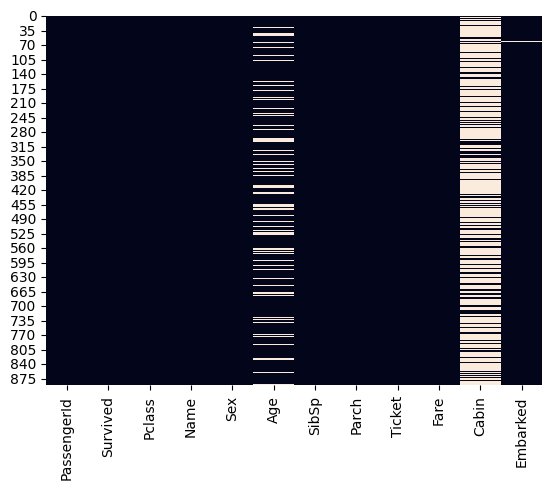

In [15]:
sns.heatmap(df_train.isnull(), cbar=False)
plt.show()

In [16]:
df_train = df_train.drop(['PassengerId'], axis=1)

In [17]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [df_train, df_test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

df_train = df_train.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)

In [18]:
gender = {'male':0, 'female':1}
data = [df_train, df_test]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(gender)

In [19]:
df_train['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [20]:
df_train = df_train.drop(['Ticket'], axis=1)
df_test = df_test.drop(['Ticket'], axis=1)

In [21]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [df_train, df_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [22]:
df_train = df_train.dropna()
df_train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Deck        0
dtype: int64

In [23]:
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)


/var/folders/mq/yj2k56b52wb8xq_lvbs09rxc0000gn/T/ipykernel_22708/2573070100.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/mq/yj2k56b52wb8xq_lvbs09rxc0000gn/T/ipykernel_22708/2573070100.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/mq/yj2k56b52wb8xq_lvbs09rxc0000gn/T/ipykernel_22708/2573070100.py:2: FutureW

In [24]:
data = [df_train, df_test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7


In [25]:
df_train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",0,2,1,0,7.2500,0.0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,71.2833,1.0,3
2,1,3,"Heikkinen, Miss. Laina",1,3,0,0,7.9250,0.0,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,53.1000,0.0,3
4,0,3,"Allen, Mr. William Henry",0,5,0,0,8.0500,0.0,8
6,0,1,"McCarthy, Mr. Timothy J",0,6,0,0,51.8625,0.0,5
7,0,3,"Palsson, Master. Gosta Leonard",0,0,3,1,21.0750,0.0,8
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3,0,2,11.1333,0.0,8
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1,1,0,30.0708,1.0,8
10,1,3,"Sandstrom, Miss. Marguerite Rut",1,0,1,1,16.7000,0.0,7


In [26]:
df_train.drop('Name', axis=1, inplace=True)

In [27]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,0,2,1,0,7.2500,0.0,8
1,1,1,1,5,1,0,71.2833,1.0,3
2,1,3,1,3,0,0,7.9250,0.0,8
3,1,1,1,5,1,0,53.1000,0.0,3
4,0,3,0,5,0,0,8.0500,0.0,8
6,0,1,0,6,0,0,51.8625,0.0,5
7,0,3,0,0,3,1,21.0750,0.0,8
8,1,3,1,3,0,2,11.1333,0.0,8
9,1,2,1,1,1,0,30.0708,1.0,8
10,1,3,1,0,1,1,16.7000,0.0,7


In [28]:
df_train['Fare'].fillna(df_train['Fare'].median(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

/var/folders/mq/yj2k56b52wb8xq_lvbs09rxc0000gn/T/ipykernel_22708/647183585.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/mq/yj2k56b52wb8xq_lvbs09rxc0000gn/T/ipykernel_22708/647183585.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [29]:
data = [df_train, df_test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)


In [30]:
data = [df_train, df_test]

for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [31]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop(["PassengerId","Name"], axis=1).copy()

In [32]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [34]:
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train, Y_train)

Y_prediction = randomForest.predict(X_test)

randomForest.score(X_train, Y_train)

acc_random_forest = round(randomForest.score(X_train, Y_train) * 100, 2)

In [36]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [37]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [38]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [39]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



In [40]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [41]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [42]:
# Initialize the XGBoost classifier
xgboost_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')

# Fit the model to the training data
xgboost_model.fit(X_train, Y_train)

# Predict the labels for the test data
Y_prediction = xgboost_model.predict(X_test)

# Calculate the accuracy on the training data
acc_xgboost = round(xgboost_model.score(X_train, Y_train) * 100, 2)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning:

[20:10:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




In [52]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree', 'XGBoost'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree, acc_xgboost]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.28,Random Forest
92.28,Decision Tree
91.57,XGBoost
83.99,KNN
80.48,Logistic Regression
79.07,Support Vector Machines
77.95,Naive Bayes
75.28,Stochastic Gradient Decent
63.34,Perceptron


In [54]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.72222222 0.75       0.74647887 0.83098592 0.85915493 0.81690141
 0.77464789 0.81690141 0.87323944 0.85915493]
Mean: 0.8049687010954616
Standard Deviation: 0.0506989270836414


In [56]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(randomForest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.308
Fare,0.113
Age_Class,0.108
Pclass,0.107
Deck,0.097
Age,0.089
SibSp,0.083
Parch,0.049
Embarked,0.046


<Axes: xlabel='feature'>

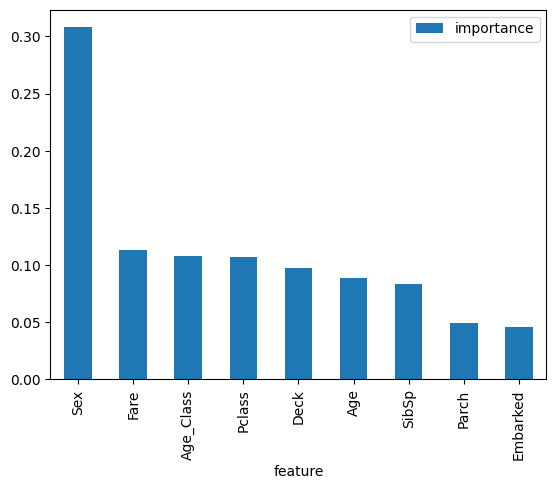

In [57]:
importances.plot.bar()